#

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm # pip install -U statsmodels patsy 
import statsmodels.formula.api as smf
import patsy as pt 

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/finches.csv")

In [10]:
df.head()

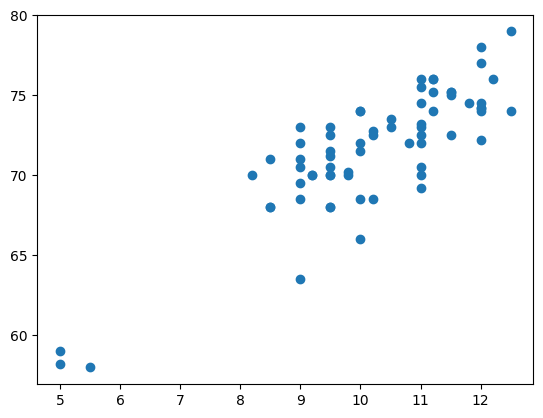

In [11]:
plt.scatter(df["beakwidth"], df["winglength"]);

In [12]:
y, X = pt.dmatrices("winglength ~ island + beakwidth", data = df) # design matricess
X[20:40]

array([[ 1. ,  1. ,  0. , 10. ],
       [ 1. ,  1. ,  0. , 10.2],
       [ 1. ,  1. ,  0. , 11. ],
       [ 1. ,  1. ,  0. , 10.5],
       [ 1. ,  1. ,  0. , 11. ],
       [ 1. ,  1. ,  0. , 10. ],
       [ 1. ,  1. ,  0. , 12. ],
       [ 1. ,  1. ,  0. , 11. ],
       [ 1. ,  1. ,  0. , 11. ],
       [ 1. ,  1. ,  0. ,  9.5],
       [ 1. ,  1. ,  0. , 11. ],
       [ 1. ,  1. ,  0. , 10.2],
       [ 1. ,  1. ,  0. , 12. ],
       [ 1. ,  1. ,  0. , 11.5],
       [ 1. ,  1. ,  0. , 11.5],
       [ 1. ,  1. ,  0. , 11.2],
       [ 1. ,  1. ,  0. , 12. ],
       [ 1. ,  1. ,  0. , 12.2],
       [ 1. ,  1. ,  0. , 12.5],
       [ 1. ,  1. ,  0. , 11.5]])

In [25]:
model = smf.ols("winglength ~ island * beakwidth", data = df)
fit = model.fit()

In [26]:
fit.summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

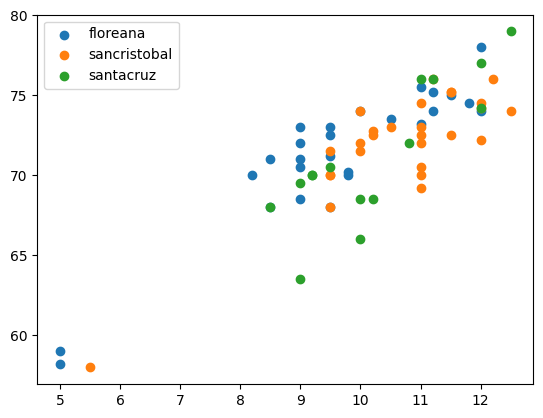

In [20]:
for name, gdf in df.groupby(["island"]):
    plt.scatter(gdf["beakwidth"], gdf["winglength"], label = name[0]);
plt.legend();

In [21]:
xnew = np.array([5, 12])
ndf = pd.DataFrame.from_dict({"beakwidth": xnew, 
                              "island": ["floreana", "floreana"]})
ndf["yhat"] = fit.predict(ndf)
ndf

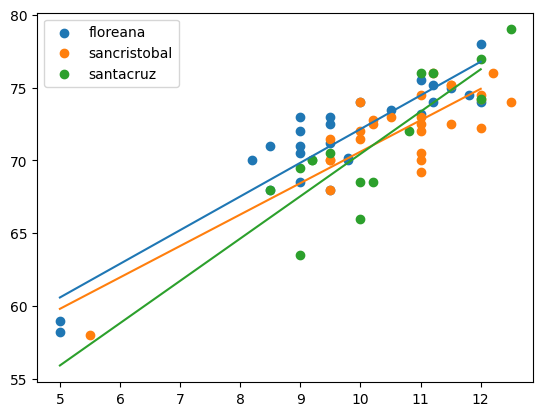

In [22]:
for name, gdf in df.groupby(["island"]):
    plt.scatter(gdf["beakwidth"], gdf["winglength"], label = name[0]);
    xnew = np.array([5, 12])
    ndf = pd.DataFrame.from_dict({"beakwidth": xnew, 
                              "island": [name[0], name[0]]})
    ndf["yhat"] = fit.predict(ndf)
    plt.plot(xnew, ndf["yhat"])
plt.legend();